In [1]:
import os
os.getcwd()

'/Users/liuhaoyue/Desktop'

# Setup
• Split the data by columns into features that you will use for prediction, X, and the feature you will try to predict (‘quality’), y

• Split both X and y by rows into training sets a testing sets

• Randomly split the data, keeping 80% of instances for training and 20% for testing

• At the end, you should have 4 data sets: X_train, y_train, X_test, and y_test

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.linear_model import Lasso,LassoCV
from sklearn.metrics import mean_squared_error


df = pd.read_csv('/Users/liuhaoyue/Desktop/courses/Personalization/HW/HW1/winequality-red.csv')
df = df['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(';',expand=True)
df["fixed acidity"],df["volatile acidity"],df["citric acid"],df['residual sugar'],df['chlorides'],df['free sulfur dioxide'],df['total sulfur dioxide'],df["density"],df["pH"],df["sulphates"],df["alcohol"],df["quality"]=df[0],df[1],df[2],df[3],df[4],df[5],df[6],df[7],df[8],df[9],df[10],df[11]
red = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']]

red.dtypes
red = red.astype({"fixed acidity":"float64","volatile acidity":"float64","citric acid":"float64","residual sugar":"float64","chlorides":"float64","free sulfur dioxide":"float64","total sulfur dioxide":"float64","density":"float64","pH":"float64","sulphates":"float64","alcohol":"float64","quality":"float64"})

red = shuffle(red)
X = red[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]
Y = red[["quality"]]
# X.shape #(1599, 11)

# x_train = X[0:1280] #1599*0.8 = 1279.2
# y_train = Y[0:1280]
# x_test = X[1280:]
# y_test = Y[1280:]
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size = 0.8)


# Regression equations and functions
### • Write out two equations: 

(1) the equation for a the linear model that predicts y from X is:

$$ \widehat{y} = \sum(x_j*β_j)$$

(2) the equation for computing the Residual Sum of Squares (RSS) for the linear model, given data, vector x, and parameters, vector β is:

$$ RSS(β) =\sum(y_i-\sum(x_{ij}*β_j))^2 = \sum(y_i - \widehat{y_i})^2$$


### • Translate these equations into code in the form of two functions
• The first function should compute the estimated value of y, which is y_hat, for particular values of x, and β. That is, there should be two arguments, one for the data and one for the linear function parameters.

• The second function should compute the RSS for the first function

In [3]:
def y_hat(x, β):
    x = np.array(x)
    y_h = np.dot(x, np.transpose(β))
    return y_h

In [5]:
# b = np.transpose(beta0)
# print(np.array(x_train).shape)
# print(b.shape)

In [6]:
def RSS(β, x, y):
    y = np.array(y.T)[0]
    res = y - y_hat(x, β)
    rss = np.sum(res**2)
    return rss

In [7]:
# print(np.array(y_test).shape)
np.array(y_train.T)[0].shape

(1279,)

In [9]:
# np.array(np.dot(x_train,beta0)).shape

# Optimizing the model
### • Use Scipy’s minimize function to find the value of β that minimize the RSS

### • Your call to minimize method will take three arguments:
• (1) fun: the RSS function you defined above that you are trying to minimize

• (2) x0: your initial values of β

• (3) args: pass in all the data a tuple here. For example:

• args=(y_train, X_train)

• For the second argument you will need to initialize β to some starting value. Try using a random vector with Numpy random methods

• numpy.random.normal(0, 1, X_train.shape[1]) • Your final set of functions to fit your model should have the form:
           $$def  RSS(beta, X, y):$$
  
                                                   return <some_results>

           res = minimize(fun=RSS, x0=beta0, args=(X_train,y_train))
           beta_hat = res.x


In [10]:
beta0 = np.random.normal(0, 1, x_train.shape[1])
res = minimize(fun=RSS, x0=beta0, args=(x_train,y_train))
beta_hat = res.x

In [11]:
print(res.fun)
print(res.success)
print(res.x)

531.5647890105664
False
[ 1.00870226e-02 -1.16202039e+00 -2.89860361e-01  1.62423283e-05
 -1.88804276e+00  4.63760016e-03 -3.63808155e-03  4.42401374e+00
 -4.83647405e-01  8.64565912e-01  2.99984358e-01]


In [12]:
x_train.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
522,8.2,0.39,0.49,2.3,0.099,47.0,133.0,0.9979,3.38,0.99,9.8


In [345]:
fixed_acidity_mean = np.mean(np.array([red['fixed acidity']]))
volatile_acidity_mean = np.mean(np.array([red['volatile acidity']]))
citric_acid_mean = np.mean(np.array([red['citric acid']]))
residual_sugar_mean = np.mean(np.array([red['residual sugar']]))
chlorides_mean = np.mean(np.array([red['chlorides']]))
free_sulfur_dioxide_mean = np.mean(np.array([red['free sulfur dioxide']]))
total_sulfur_dioxide_maen = np.mean(np.array([red['total sulfur dioxide']]))
density_mean = np.mean(np.array([red['density']]))
pH_mean = np.mean(np.array([red['pH']]))
sulphates_mean = np.mean(np.array([red['sulphates']]))
alcohol_mean = np.mean(np.array([red['alcohol']]))
print("Mean:")
print(fixed_acidity_mean,'\n',volatile_acidity_mean,'\n',citric_acid_mean,'\n',residual_sugar_mean,'\n',chlorides_mean,'\n',free_sulfur_dioxide_mean,'\n',total_sulfur_dioxide_maen,'\n',density_mean,'\n',pH_mean,'\n',sulphates_mean,'\n',alcohol_mean)
fixed_acidity_var = np.var(np.array([red['fixed acidity']]))
volatile_acidity_var = np.var(np.array([red['volatile acidity']]))
citric_acid_var = np.var(np.array([red['citric acid']]))
residual_sugar_var = np.var(np.array([red['residual sugar']]))
chlorides_var = np.var(np.array([red['chlorides']]))
free_sulfur_dioxide_var = np.var(np.array([red['free sulfur dioxide']]))
total_sulfur_dioxide_var = np.var(np.array([red['total sulfur dioxide']]))
density_var = np.var(np.array([red['density']]))
pH_var = np.var(np.array([red['pH']]))
sulphates_var = np.var(np.array([red['sulphates']]))
alcohol_var = np.var(np.array([red['alcohol']]))
print()
print("Variance:")
print(fixed_acidity_var,'\n',volatile_acidity_var,'\n',citric_acid_var,'\n',residual_sugar_var,'\n',chlorides_var,'\n',free_sulfur_dioxide_var,'\n',total_sulfur_dioxide_var,'\n',density_var,'\n',pH_var,'\n',sulphates_var,'\n',alcohol_var)


Mean:
8.31963727329581 
 0.5278205128205128 
 0.2709756097560976 
 2.53880550343965 
 0.08746654158849282 
 15.874921826141339 
 46.46779237023139 
 0.9967466791744841 
 3.3111131957473416 
 0.6581488430268919 
 10.422983114446529

Variance:
3.0295205688671114 
 0.0320423261333205 
 0.037923751124940897 
 1.9866539202698996 
 0.0022137573233114347 
 109.34645676374501 
 1081.42563558916 
 3.5598017926307083e-06 
 0.023820274241131784 
 0.028714647013983487 
 1.1349371714889036


# Questions and Answers
#### Q1:What are the qualitative results from your model? Which features seem to be most important? Do you think that the magnitude of the features in X may affect the results (for example, the average total sulfur dioxide across all wines is 46.47, but the average chlorides is only 0.087).

#### Ans:
The qualitative results from my model is attached to the next cell code.
According to the resulted beta, the density is the most important feature as the beta parameter for it is the highest and are positively related.
I think the magnitude of the features in X may affect the results. For example, the variance of total sulfur dioxide across red wine is 1081.42563558916 while the variance of chlorides is only 0.002213757323311435.
Also, we can expect after taking normalization, the most important feature will change. The magnitude of the features in X affect this result because it will affect the magnitude of beta_hat.

In [13]:
print("The qualitative results from my model for training data set: ", res.fun)
print()
print("The qualitative results from my model for test data set: ", RSS(res.x, x_test, y_test))

The qualitative results from my model for training data set:  531.5647890105664

The qualitative results from my model for test data set:  136.2985526469571


#### Q2: 
How well does your model fit? You should be able to measure the goodness of fit, RSS, on both the training data and the test data, but only report the results on the test data. In Machine Learning we almost always only care about how well the model fits on data that has not been used to fit the model, because we need to use the model in the future, not the past. Therefore, we only report performance with holdout data, or test data.

In [14]:
# RSS for training data
print('RSS for training data: ', res.fun)

# RSS for training data
res_test = RSS(res.x, x_test, y_test)
print('RSS for test data: ', res_test, ' And this is the goodness of fit to be reported.')

RSS for training data:  531.5647890105664
RSS for test data:  136.2985526469571  And this is the goodness of fit to be reported.


In [16]:
tss_train = np.sum((y_train-np.mean(y_train))**2)
tss_test = np.sum((y_test-np.mean(y_test))**2)
print('R^2 for train data: ', 1-res.fun/tss_train)
print('R^2 is the goodness of fit to be reported: ', 1-res_test/tss_test)

R^2 for train data:  quality    0.364367
dtype: float64
R^2 is the goodness of fit to be reported:  quality    0.337462
dtype: float64


#### Q3:
Does the end result or RSS change if you try different initial values of β? What happens if you change the magnitude of the initial β?

In [17]:
beta1 = np.random.normal(-1, 1, x_train.shape[1])
res1 = minimize(fun=RSS, x0=beta1, args=(x_train,y_train))
rss_change1 = res.fun - res1.fun
print('With initail values of β being from (-1,1): ', res1.fun, '\n', 'And the RSS change is: ', rss_change1)

beta2 = np.random.normal(-1, 0, x_train.shape[1])
res2 = minimize(fun=RSS, x0=beta2, args=(x_train,y_train))
rss_change2 = res.fun - res2.fun
print('With initail values of β being from (-1,0): ', res2.fun, '\n', 'And the RSS change is: ', rss_change2)

With initail values of β being from (-1,1):  531.5647890105427 
 And the RSS change is:  2.376054908381775e-11
With initail values of β being from (-1,0):  531.564789010559 
 And the RSS change is:  7.389644451905042e-12


#### Ans:
Therefore, changing the magnitude of the initial β will not result in RSS change.

#### Q4: 
Does the choice of solver method change the end result or RSS?

In [21]:
# method = Nelder-Mead
res_Nelder_Mead = minimize(fun=RSS, x0=beta0, args=(x_train,y_train), method = 'Nelder-Mead')
end_result_Nelder_Mead = y_hat(x_train, res_Nelder_Mead.x)
RSS_Nelder_Mead = RSS(res_Nelder_Mead.x, x_test, y_test)
print('End result with "Nelder-Mead" method is: ', end_result_Nelder_Mead, '\n','RSS with "Nelder-Mead" method is: ',RSS_Nelder_Mead)
print()
# method = Powell
res_Powell = minimize(fun=RSS, x0=beta0, args=(x_train,y_train), method = 'Powell')
end_result_Powell = y_hat(x_train, res_Powell.x)
RSS_Powell = RSS(res_Powell.x, x_test, y_test)
print('End result with "Powell" method is: ', end_result_Powell, '\n','RSS with "Powell" method is: ',RSS_Powell)
print()
# method = CG
res_CG = minimize(fun=RSS, x0=beta0, args=(x_train,y_train), method = 'CG')
end_result_CG = y_hat(x_train, res_CG.x)
RSS_CG = RSS(res_CG.x, x_test, y_test)
print('End result with "CG" method is: ', end_result_CG, '\n','RSS with "CG" method is: ',RSS_CG)
print()
# method = BFGS
res_BFGS = minimize(fun=RSS, x0=beta0, args=(x_train,y_train), method = 'BFGS')
end_result_BFGS = y_hat(x_train, res_BFGS.x)
RSS_BFGS = RSS(res_BFGS.x, x_test, y_test)
print('End result with "BFGS" method is: ', end_result_BFGS, '\n','RSS with "BFGS" method is: ',RSS_BFGS)
print()

End result with "Nelder-Mead" method is:  [4.88667573 5.58262314 6.35373584 ... 6.36167389 5.88923389 5.52369961] 
 RSS with "Nelder-Mead" method is:  186.44282247844174

End result with "Powell" method is:  [5.62333296 5.04812949 7.45189458 ... 6.28268444 5.64495839 5.61230925] 
 RSS with "Powell" method is:  136.73024369131002

End result with "CG" method is:  [5.60792745 5.04479145 7.37628293 ... 6.29285691 5.68458952 5.62437182] 
 RSS with "CG" method is:  136.27409863100036

End result with "BFGS" method is:  [5.61047959 5.04535353 7.38436936 ... 6.29063881 5.67933405 5.6228695 ] 
 RSS with "BFGS" method is:  136.2985526469571



#### Ans:
Thus, changing of solver method does change the end result and RSS!

# Regularizing the model
#### Q1
Try adding in an L2 (aka Ridge) regularization penalty to your model above to create a new, regularized model. See equation 3.41 for guidance. You will need to choose a value of lambda, so start with something small, like 0.01.

$$ RSS(β) =\sum(y_i-\sum(x_{ij}*β_j))^2 + λ*β^T*β = \sum(y_i - \widehat{y_i})^2 + λ*β^T*β$$


In [22]:
def RSS_L2(β, x, y, λ):
    y = np.array(y.T)[0]
    res = y - y_hat(x, β)
    rss = np.sum(res**2) + λ* np.dot(np.transpose(β), β)
    return rss

#### • Q1.1
How does RSS on the training data change? How does RSS on the test data change?

In [23]:
res_train_001 = minimize(fun=RSS_L2, x0=beta0, args=(x_train,y_train,0.01))
print('RSS on the training data change with L2 penalty is: ', res_train_001.fun)

res_test_001 = RSS_L2(res_train_001.x, x_test, y_test,0.01)
print('RSS on the training data change with L2 penalty is: ', res_test_001)

print('RSS on the training data nearly has no change.')
print('RSS on the test data also nearly has no change.')

RSS on the training data change with L2 penalty is:  531.8183229141952
RSS on the training data change with L2 penalty is:  136.56210063888594
RSS on the training data nearly has no change.
RSS on the test data also nearly has no change.


RSS on both the training data and the test data slightly increase.

#### •Q1.2
What happens if you try different values of lambda? Can you tune lambda to get the best results on the test data?

#### Ans:
Trying different values of lambda, the model coefficients will change.

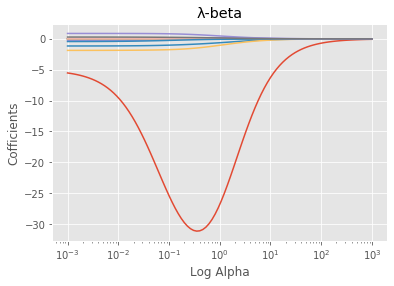

In [24]:
λs = 10**np.linspace(-3,3,100)
ridge_cofficients = []

for λ in λs:
    ridge = Ridge(alpha = λ, normalize=True)
    ridge.fit(x_train, y_train)
    ridge_cofficients.append(ridge.coef_[0])

# print(ridge_cofficients)
plt.style.use('ggplot')
plt.plot(λs, ridge_cofficients)
plt.xscale('log')
plt.axis('tight')
plt.title('λ-beta')
plt.xlabel('Log Alpha')
plt.ylabel('Cofficients')
plt.show()


#### According to the diagram, the λ should be really samll and close to 0, from where all coeeficients tend to be stable. I will use cross-validation and grid search to double check my hypothesis as below.

In [25]:
warnings.filterwarnings('ignore')
ridge_cv = RidgeCV(alphas = λs, normalize = True, cv = 10)
ridge_cv.fit(x_train, y_train)
ridge_best_lambda = ridge_cv.alpha_
print(ridge_best_lambda)

0.07564633275546291


0.0 136.2985526469571


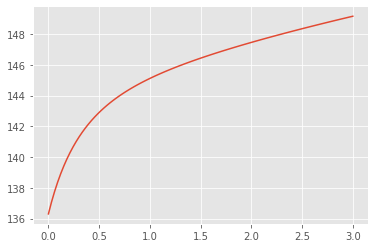

In [98]:
λs = np.linspace(0,3,100)
r = []
for lmda in λs:
    res_ = minimize(fun = RSS_L2, x0 = beta0, args = (x_train, y_train, lmda))
    beta_L2 = res_.x
    r.append(RSS_L2(beta_L2,x_test,y_test,lmda))
best_lmda_L2 = λs[np.argmin(r)]
best_RSS = min(r)
print(best_lmda_L2,best_RSS)
plt.plot(λs,r)
plt.show()

By grid search, the best λ is 0. Thus, we cannot tune λ to get the lowest RSS. Also, adding L2 regularization, the RSS for both trainning data and test data increase slightly. So there is useless to tune λ.

#### Q2
Now try using an L1 (aka Lasso) regularization penalty instead. See equation 3.51 for example. Report your findings on how RSS changes, and if you can roughly tune lambda.
$$RSS(β) = \sum(y_i-\widehat{y_i})^2+ \lambda \sum|\widehat{\beta_k}|$$

In [73]:
def RSS_L1(β, x, y, λ):
    y = np.array(y.T)[0]
    res = y - y_hat(x, β)
    rss = np.sum(res**2) + λ* np.sum(np.abs(β))
    return rss

In [74]:
res_train_001_L1 = minimize(fun=RSS_L1, x0=beta0, args=(x_train,y_train,0.01))
print('RSS on the training data change with L1 penalty is: ', res_train_001_L1.fun)

res_test_001_L1 = RSS_L1(res_train_001.x, x_test, y_test,0.01)
print('RSS on the training data change with L1 penalty is: ', res_test_001_L1)

print('RSS on the training data nearly has no change.')
print('RSS on the test data also nearly has no change.')

RSS on the training data change with L1 penalty is:  531.659023081383
RSS on the training data change with L1 penalty is:  136.4048554060495
RSS on the training data nearly has no change.
RSS on the test data also nearly has no change.


#### Ans:
Trying different values of lambda, the model coefficients will change.

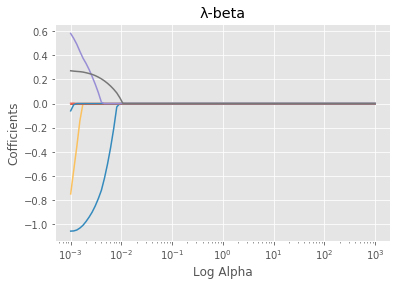

In [76]:
λs = 10**np.linspace(-3,3,100)
lasso_cofficients = []

for λ in λs:
    lasso = Lasso(alpha = λ, normalize=True, max_iter=10000)
    lasso.fit(x_train, y_train)
    lasso_cofficients.append(lasso.coef_)

# print(ridge_cofficients)
plt.style.use('ggplot')
plt.plot(λs, lasso_cofficients)
plt.xscale('log')
plt.axis('tight')
plt.title('λ-beta')
plt.xlabel('Log Alpha')
plt.ylabel('Cofficients')
plt.show()


#### According to the diagram, the λ should be around 0, from where all coeeficients tend to be stable. I will use cross-validation and grid search to double check my hypothesis as below.

In [77]:
lasso_cv = LassoCV(alphas = λs, normalize=True, cv = 10, max_iter=10000)
lasso_cv.fit(x_train, y_train.values.ravel())
lasso_best_lambda = lasso_cv.alpha_
print(lasso_best_lambda)

0.001


1e-05 136.29864777721764


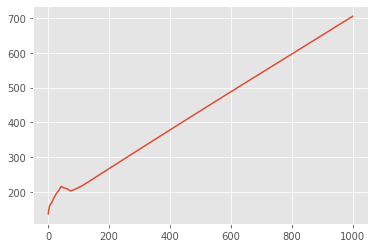

In [99]:
λs = 10**np.linspace(-5,3,100)
r = []
for lmda in λs:
    res_ = minimize(fun = RSS_L1, x0 = beta0, args = (x_train, y_train, lmda))
    beta_L1 = res_.x
    r.append(RSS_L1(beta_L1,x_test,y_test,lmda))
best_lmda_L1 = λs[np.argmin(r)]
best_RSS = min(r)
print(best_lmda_L1,best_RSS)
plt.plot(λs,r)
plt.show()

The smaller value lambda is, the smaller RSS we get on test data. We cannot tune lamda because we can select infinite values that are really close to 0 to get better results. Also, after adding regularization, RSS for both training and test data incease slightly. Thus we cannot tune lamda

#### • Q2.1
Again, do you think that the magnitude of the features in X may affect the results with regularization

In [102]:
print(RSS_L2(beta0, x_test, y_test, best_lmda_L2))
print(RSS_L1(beta0, x_test, y_test, best_lmda_L1))

1065066.8744268077
1065066.8745039094


#### Ans
Yes, as the RSS for both regularization increase a lot, I think the magnitude of the features in X may affect the results with regularization and we can use nomalization to help us verify this.

In [112]:
# def norm(x):
#     return x-min(x)/max(x)-min(x)
# x_train_copy = x_train.copy()
# x_test_copy = x_test.copy()
# for i in range(11):
#     x_train_copy.iloc[:,i] = norm(x_train_copy.iloc[:,i])
# res = minimize(fun = RSS_L1, x0 = beta0, args = (x_train_copy,y_train,best_lmda))
# beta_hat = res.x
# RSS_L1(beta_hat,x_test, y_test, best_lmda_L1)